# Introduction: Interacting with Slack from Python

In this notebook, we will use `Slacker` to interact with Slack. This allows us to send messages and upload files, which can be useful when training models, or monitoring scripts (or just for fun of course)!

First off, install the package. Documentation can be found [here](https://github.com/os/slacker). 

In [ ]:
!pip install -q -U Slacker

In [1]:
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

# Slacker 
from slacker import Slacker

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Displaying images
from IPython.display import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Get a Slack Legacy API Token

Most importantly, you need a [Slack workspace](https://slack.com/). I recommend making your own workspace where you are the admin just to get familiar with this package. Once you have your workspace, obtain a legacy token to enable interaction. Head to the following link to get a token.

https://api.slack.com/custom-integrations/legacy-tokens

![](images/legacy_tokens.PNG)

Store the token in a safe location (not on GitHub)!

This token will allow us to do anything one can do through the Slack API. The full documentation for the Slack API is [here](https://api.slack.com/methods)

## Authenticate with Slack

Replace the line below with the location of your slack api token.

In [2]:
with open('C:/Users/willk/OneDrive/Desktop/slack_api_python.txt', 'r') as f:
    slack_api_token = f.read()

Next we authenticate with slack by instantiating a `Slacker` object. We'll test this by checking in our connection is `successful`.

In [3]:
# Connect to Slack
slack = Slacker(slack_api_token)
if slack.api.test().successful:
    print(f"Successfully connected to {slack.team.info().body['team']['name']}.")
else:
    print('Try Again!')

Successfully connected to Data Analysis.


# Interacting with Slack

Anything (okay, nearly anything) you can do in Slack you can do through the Python API. First, let's just do some basic info retrieval. 

## Retrieving Information

Each time you make a request for information, you get back `response` object. The `body` object of the response holds the details of the request (if successful).

In [4]:
r = slack.team.info()
r.body

{'ok': True,
 'team': {'id': 'TCD256PSM',
  'name': 'Data Analysis',
  'domain': 'python-data',
  'email_domain': 'case.edu',
  'icon': {'image_34': 'https://avatars.slack-edge.com/2018-11-30/492734348690_802c4805ab4a0d29383b_34.png',
   'image_44': 'https://avatars.slack-edge.com/2018-11-30/492734348690_802c4805ab4a0d29383b_44.png',
   'image_68': 'https://avatars.slack-edge.com/2018-11-30/492734348690_802c4805ab4a0d29383b_68.png',
   'image_88': 'https://avatars.slack-edge.com/2018-11-30/492734348690_802c4805ab4a0d29383b_88.png',
   'image_102': 'https://avatars.slack-edge.com/2018-11-30/492734348690_802c4805ab4a0d29383b_102.png',
   'image_132': 'https://avatars.slack-edge.com/2018-11-30/492734348690_802c4805ab4a0d29383b_132.png',
   'image_230': 'https://avatars.slack-edge.com/2018-11-30/492734348690_802c4805ab4a0d29383b_230.png',
   'image_original': 'https://avatars.slack-edge.com/2018-11-30/492734348690_802c4805ab4a0d29383b_original.png'}}}

In [5]:
from IPython.display import Image

Image(url = 'https://avatars.slack-edge.com/2018-11-30/492734348690_802c4805ab4a0d29383b_230.png')

## What Can We Do?

This is our workspace's icon! (Okay that's not very exciting.) To see everything we can do with Slacker, let's take a look at the methods and attributes.

In [9]:
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
from utils import get_data_and_model, get_options
                    
command_dict = get_options(slack)
command_dict['functions']['users']
command_dict['functions']['channels']

['get',
 'get_presence',
 'get_user_id',
 'identity',
 'info',
 'list',
 'post',
 'set_active',
 'set_presence']

['archive',
 'create',
 'get',
 'get_channel_id',
 'history',
 'info',
 'invite',
 'join',
 'kick',
 'leave',
 'list',
 'mark',
 'post',
 'rename',
 'replies',
 'set_purpose',
 'set_topic',
 'unarchive']

We can look at all the channels by iterating through them.

In [10]:
channels = slack.channels.list().body

# Iterate through channels
for channel in channels['channels']:
    print(f'Channel {channel["name"]} Purpose: {channel["purpose"]["value"]}\n')

Channel general Purpose: This channel is for workspace-wide communication and announcements. All members are in this channel.

Channel python_content Purpose: 

Channel python_content2 Purpose: Working with Python and Slack

Channel python_content3 Purpose: Sharing great python related resources

Channel random Purpose: Deep philosophical discussions around the water cooler.

Channel slack_interaction Purpose: To interact with Slack from Python

Channel testing_exp Purpose: Experimental testing of interactions.

Channel training_report Purpose: Report progress while training machine learning models



Here's the history of the `general` channel.

In [11]:
slack.channels.history(channel = 'CCCT28F08').body

{'ok': True,
 'messages': [{'client_msg_id': 'cd129804-bf06-473c-acb7-52458abcc167',
   'type': 'message',
   'text': "It's a little lonely in here. <@USLACKBOT> are you out there?",
   'user': 'UCEKVNHPH',
   'ts': '1543624786.001400'},
  {'client_msg_id': '65a363a4-265a-4c1d-bb21-914fea4af7fd',
   'type': 'message',
   'text': "And please don't answer 42!",
   'user': 'UCEKVNHPH',
   'ts': '1543624766.000900'},
  {'client_msg_id': '6ace906a-76dd-4482-8001-de3cc8cabcdf',
   'type': 'message',
   'text': 'What is the meaning of life?',
   'user': 'UCEKVNHPH',
   'ts': '1543624759.000600'},
  {'client_msg_id': 'b43989fc-4e86-4f7d-9ac7-295c0a34597b',
   'type': 'message',
   'text': 'Anyone going to that Python meetup tonight?',
   'user': 'UCEKVNHPH',
   'ts': '1543616388.000300'},
  {'user': 'UCEKVNHPH',
   'type': 'message',
   'subtype': 'channel_join',
   'ts': '1534988091.000200',
   'text': '<@UCEKVNHPH> has joined the channel'}],
 'has_more': False}

We can also see all of the users along with their profile photo.


User: wjk68, Real Name: Will Koehrsen, Time Zone: Eastern Standard Time.
Current Status: 


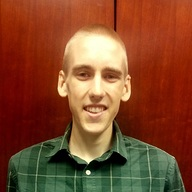


User: slackbot, Real Name: slackbot, Time Zone: Pacific Standard Time.
Current Status: 


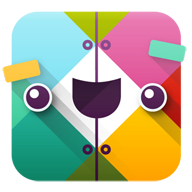

In [12]:
users = slack.users.list().body

for user in users['members']:
    # Print some information
    print(f'\nUser: {user["name"]}, Real Name: {user["real_name"]}, Time Zone: {user["tz_label"]}.')
    print(f'Current Status: {user["profile"]["status_text"]}')
    # Get image data and show
    Image(user['profile']['image_192'])

## IDs

When we interact with a `channel` or `user`, it's generally best to refer to it by the `id`. Therefore, it can be helpful to set up a mapping of channels and users to their ids.

In [13]:
channel_dict = {}

for channel in channels['channels']:
    channel_dict[channel['name']] = channel['id']
    
user_dict = {}

for user in users['members']:
    user_dict[user['name']] = user['id']
    
user_dict

{'wjk68': 'UCEKVNHPH', 'slackbot': 'USLACKBOT'}

It's pretty lonely in this Slack workspace! Now, we can alter any attributes of users of channels with the ids For example, we can set the purpose of the `python_content` channel as follows.

In [14]:
# Set the purpose of the channel
r = slack.channels.set_purpose(channel_dict['python_content2'], 
                           purpose = 'Working with Python and Slack')

channels = slack.channels.list().body

# Iterate through channels
for channel in channels['channels']:
    if channel['name'] == 'python_content2':
        print(f'Channel {channel["name"]} Purpose: {channel["purpose"]["value"]}\n')

Channel python_content2 Purpose: Working with Python and Slack



Let's change a few of my attributes. 

In [15]:
me = users['members'][0]
me['profile']['title']
me['profile']['display_name']
me['profile']['status_text']
me['profile']['status_emoji']

'Data Scientist and Writer'

'Willk'

''

':male-technologist:'

In [16]:
for new_value, name in zip(['Data Scientist and Writer', 'Willk', 'Coding', ':male-technologist:'],
                          ['title', 'display_name', 'status_text', 'status_emoji']):
    
    r = slack.users.profile.set(user = user_dict['wjk68'],
                               name = name, value = new_value)
    if not r:
        print(r.error)

In [17]:
users = slack.users.list().body
me = users['members'][0]
me['profile']['title']
me['profile']['display_name']
me['profile']['status_text']
me['profile']['status_emoji']

'Data Scientist and Writer'

'Willk'

''

':male-technologist:'

In [18]:
import emoji

def print_emoji(emoji_name):
    print(emoji.emojize(emoji_name, use_aliases=True))
    
print_emoji(':runner:')

🏃


In [19]:
print_emoji(':computer:')

💻


### The All-Important Emoji

Emoji's are set using the `:name:` emoji code notation. The easiest way to figure out which one to use is go to Slack, bring up the emoji's hover over the one you want, and find the name.

![](images/emoji_choose.PNG)

Here's an image of all the available emoji at once. You can find all emoji codes at https://www.webpagefx.com/tools/emoji-cheat-sheet/.

In [20]:
Image(url = 'https://a.slack-edge.com/c00d19/img/emoji_2017_12_06/sheet_google_64_indexed_256.png')

### Searching

You can search through any messages or files in your team's workspace.

In [21]:
def convert_ts(ts):
    return pd.to_datetime(ts, unit='s').date()

In [22]:
matches = slack.search.messages(query = 'Python').body['messages']['matches']
for match in matches:
    print(f"Time: {convert_ts(match['ts'])}, Text: {match['text']}")

Time: 2018-11-30, Text: Python is better than MatLab! :+1::skin-tone-5:
Time: 2018-11-30, Text: Anyone going to that Python meetup tonight?


In [23]:
print(emoji.emojize("Python is fun :+1:", use_aliases=True))

Python is fun 👍


### Do Not Disturb

You can even find the do not disturb settings for everyone on your team.

In [24]:
slack.dnd.team_info().body

{'ok': True,
 'users': {'UCEKVNHPH': {'dnd_enabled': True,
   'next_dnd_start_ts': 1543633200,
   'next_dnd_end_ts': 1543669200}}}

If you want to tell everyone to leave you alone, go ahead and do so! 

In [25]:
slack.dnd.set_snooze(num_minutes = 120).body

{'ok': True,
 'snooze_enabled': True,
 'snooze_endtime': 1543633672,
 'snooze_remaining': 7200}

In [26]:
slack.dnd.end_snooze().body

{'ok': True,
 'dnd_enabled': True,
 'next_dnd_start_ts': 1543633200,
 'next_dnd_end_ts': 1543669200,
 'snooze_enabled': False}

## Creating a New Channel

Let's make a brand new channel.

In [125]:
new_channel_name = 'python_content_new2'

# Create new channel
slack.channels.create(new_channel_name)
new_id = slack.channels.get_channel_id(new_channel_name)

# Set channel purpose
slack.channels.set_purpose(new_id, 'Data Science and Python')
r = slack.channels.info(new_id)
r.body['channel']['latest']

{'user': 'UCEKVNHPH',
 'type': 'message',
 'subtype': 'channel_purpose',
 'ts': '1543629800.000400',
 'text': '<@UCEKVNHPH> set the channel purpose: Data Science and Python',
 'purpose': 'Data Science and Python'}

## Additional Options

Nearly anything you want to do on Slack you can do through this API! Feel free to check out all of the options (which you can find in the `command_dict`). The [Slack API reference](https://api.slack.com/methods) is helpful for formulating commands.

# Posting Messages

Now let's get to the heart of why we want to interact with Slack: posting new messages. It's relatively simple to post a message to any channel. 

In [27]:
r = slack.chat.post_message(channel = 'python_content', 
                            text = 'Have a great day!',
                            username = 'Python Test',
                            icon_url = 'http://devarea.com/wp-content/uploads/2017/11/python-300x300.png')
r.successful

True

![](images/posted_message.PNG)

In [31]:
slack.channels.history(channel = channel_dict['python_content']).body['messages'][0]['text']

'Have a great day!'

Links are automatically expanded.

In [122]:
r = slack.chat.post_message(channel = 'python_content', 
                            text = "Here's an uplifting story: https://www.forbes.com/sites/stevedenning/2017/11/30/why-the-world-is-getting-better-why-hardly-anyone-knows-it/#181c93b27826",
                            unfurl_links = True,
                            username = 'Uplift',
                            icon_emoji = ':point_up::skin-tone-5:')
r.successful

True

![](images/unfurl.PNG)

### Mentioning Users

You can mention specific users with `<@user_id>`.

In [88]:
r = slack.chat.post_message(channel = 'python_content', 
                            text = '<@UCEKVNHPH> Have you read any good books lately?',
                            link_names = True,
                            username = 'Query',
                            icon_emoji = ':green_book:')
r.successful

True

![](images/query.PNG)

We can also post as ourselves.

In [89]:
r = slack.chat.post_message(channel = 'python_content', 
                            text = 'Anyone up for a trip to the store?',
                            as_user = 'willk')
r.successful

True

![](images/my_posted_message.PNG)

In [90]:
slack.channels.history(channel = channel_dict['python_content']).body['messages'][0]['text']

'Anyone up for a trip to the store?'

Of course you can also notify everyone! 

In [96]:
r = slack.chat.post_message(channel = 'python_content',
                            text = '<!everyone> *This is not a test!*',
                            username = 'Alert',
                            icon_emoji = ':female-firefighter:')
r.successful

True

![](images/Alert.PNG)

## Complex Messages

Messages can be as complex as you want using attachments.

In [106]:
r = slack.chat.post_message(channel = 'random',
                            username = 'Fancy Message',
                            icon_emoji = ':earth_africa:',
                            attachments =  [
        {
            "fallback": "Required plain-text summary of the attachment.",
            "color": "#2eb886",
            "pretext": "Optional text that appears above the attachment block",
            "author_name": "Fancy Message",
            "title": "Slack API Documentation",
            "title_link": "https://api.slack.com/",
            "text": "Optional text that appears within the attachment",
            "fields": [
                {
                    "title": "Priority",
                    "value": "High",
                    "short": False
                }
            ],
            "image_url": "http://my-website.com/path/to/image.jpg",
            "thumb_url": "http://example.com/path/to/thumb.png",
            "footer": "Slack API",
            "footer_icon": "https://platform.slack-edge.com/img/default_application_icon.png",
            "ts": 123456789
        }
    ]
                           )

![](images/complex.PNG)

We can even do crazy things like posting clickable games! 

In [107]:
r = slack.chat.post_message(channel = 'random', text = 'Play a game!',
                        username = 'Game Overseer', 
                        icon_emoji = ':black_joker:',
                   attachments = [
        {
            "text": "Choose a game to play",
            "fallback": "You are unable to choose a game",
            "callback_id": "wopr_game",
            "color": "#3AA3E3",
            "attachment_type": "default",
            "actions": [
                {
                    "name": "game",
                    "text": "Chess",
                    "type": "button",
                    "value": "chess",
                    "confirm": {
                        "title": "Chess is a great game for the mind",
                        "text": "Are you up to the challenge?",
                        "ok_text": "Yes",
                        "dismiss_text": "No"
                    }
                },
                {
                    "name": "game",
                    "text": "Falken's Maze",
                    "type": "button",
                    "value": "maze",
                    "confirm": {
                        "title": "Mazes aren't that interesting!",
                        "text": "How about the other options?",
                        "ok_text": "Yes",
                        "dismiss_text": "No"
                    }
                },
                {
                    "name": "game",
                    "text": "Thermonuclear War",
                    "style": "danger",
                    "type": "button",
                    "value": "war",
                    "confirm": {
                        "title": "Are you sure?",
                        "text": "Wouldn't you prefer a good game of chess?",
                        "ok_text": "Yes",
                        "dismiss_text": "No"
                    }
                }
            ]
        }
    ]
                  )

![](images/game_button.PNG)

# Uploading Files

One of my favorite parts of Slack is uploading files. This is done using a local file stored on your machine.

In [108]:
r = slack.files.upload(file_ = 'images/volcano_crater.jpg',
                   channels= ['random'], title = 'Volcano Crater',
                   initial_comment = 'This would make a great display background')
r.successful

True

In [109]:
img_url = r.body['file']['thumb_480']
img_url

'https://files.slack.com/files-tmb/TCD256PSM-FEG7U7NE5-36d4810439/volcano_crater_480.jpg'

In [110]:
from IPython.display import Image
Image(url=img_url)

# Posting Plots

Once we know how to upload files, we can start posting results of our analyses.

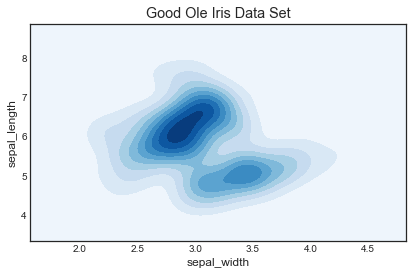

In [126]:
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# Basic 2D density plot
sns.set_style("white")
 
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(df.sepal_width, df.sepal_length, cmap="Blues", shade=True, shade_lowest=True, );
plt.title('Good Ole Iris Data Set');

# Save last figure
plt.savefig('iris_plot.png', dpi = 500);

In [127]:
r = slack.files.upload(file_='iris_plot.png', 
                       channels = ['slack_interaction','python_content3'],
                  title = 'Iris Seaborn Plot', 
                    initial_comment = "I've seen this data set way too many times. Seaborn makes some nice plots though.")

![](images/plot_posted.PNG)

# Monitor Training

Let's get serious and use slack for some real work. Here we'll monitor the progess of a convolutional neural network as it is training.

First we'll create a new channel if it does not yet exist.

In [128]:
channel_list = [c['name'] for c in slack.channels.list().body['channels']]

new_channel = 'training_report'

if new_channel not in channel_list:
    slack.channels.create('training_report')
    
cid = slack.channels.get_channel_id('training_report')
r = slack.channels.set_purpose(cid, 'Report progress while training machine learning models')
r = slack.channels.set_topic(cid, 'Progress Monitoring')
r = slack.channels.info(cid).body
r['channel']['latest']

{'user': 'UCEKVNHPH',
 'type': 'message',
 'subtype': 'channel_topic',
 'ts': '1543630034.004000',
 'text': '<@UCEKVNHPH> set the channel topic: Progress Monitoring',
 'topic': 'Progress Monitoring'}

### Model and Data

Now we'll import some data and a model. This is just a basic convolutional neural network that will be trained to identify numbers (MNIST). The script is from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [129]:
from utils import get_data_and_model

x_train, x_test, y_train, y_test, model = get_data_and_model()
model.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dro

### Keras Custom Callback

We'll write a quick custom Keras callback that reports the progress while training. Refer to [the documentation](https://keras.io/callbacks/) for specifics. 



In [130]:
from keras.callbacks import Callback
from datetime import datetime

def report_stats(text, channel):
    """Report training stats"""
    r = slack.chat.post_message(channel = channel, text = text, 
                                username = 'Training Report',
                                icon_emoji = ':clipboard:')
    
    if r.successful:
        return True
    else:
        return r.error
    

In [ ]:
from timeit import default_timer as timer

class SlackUpdate(Callback):
    """Custom Keras callback that posts to Slack while training a"""
    def __init__(self, channel):
        self.channel = channel
    
    def on_train_begin(self, logs={}):
        report_stats(text = f'Training started at {datetime.now()}',
                     channel = new_channel)
        
        self.start_time = timer()
        self.train_acc = []
        self.valid_acc = []
        self.train_loss = []
        self.valid_loss = []
        self.n_epochs = 0
    
    def on_epoch_end(self, batch, logs={}):

        self.train_acc.append(logs.get('acc'))
        self.valid_acc.append(logs.get('val_acc'))
        self.train_loss.append(logs.get('loss'))
        self.valid_loss.append(logs.get('val_loss'))
        self.n_epochs += 1
        
        message = f'Epoch: {self.n_epochs} Training Loss: {self.train_loss[-1]:.4f} Validation Loss: {self.valid_loss[-1]:.4f}'
        
        report_stats(message, channel = self.channel)
        
    def on_train_end(self, logs={}):
        
        best_epoch = np.argmin(self.valid_loss)
        valid_loss = self.valid_loss[best_epoch]
        train_loss = self.train_loss[best_epoch]
        train_acc = self.train_acc[best_epoch]
        valid_acc = self.valid_acc[best_epoch]
        
        
        message = f'Trained for {self.n_epochs} epochs. Best epoch was {best_epoch + 1}.'
        report_stats(message, channel = self.channel)
        message = f'Best validation loss = {valid_loss:.4f} Training Loss = {train_loss:.2f} Validation accuracy = {100*valid_acc:.2f}%'
        report_stats(message, channel= self.channel)
        

        

In [ ]:
updater = SlackUpdate(channel = new_channel)

import tensorflow as tf

history = model.fit(x_train, y_train, epochs = 2, batch_size = 512,
                    callbacks = [updater], validation_split = 0.4)



In [ ]:
plt.style.use('fivethirtyeight')

def plot_history(history):
    
    best_epoch = np.argmin(history['val_loss'])
    best_loss = history['val_loss'][best_epoch]
    best_acc = history['val_acc'][best_epoch]
    best_epoch += 1
    
    epochs = list(range(1, len(history['loss']) + 1))
    plt.figure(figsize = (18, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], '-o', ms = 10, label = "Training Loss")
    plt.plot(epochs, history['val_loss'], '-*',  ms = 10, label = "Validation Loss")
    plt.legend(); 
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.title('Losses');
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['acc'], '-o', ms = 10, label = 'Training Acc')
    plt.plot(epochs, history['val_acc'], '-*',  ms = 10, label = "Validation Acc")
    plt.legend()
    plt.xlabel('Epoch'); plt.ylabel('Acc')
    plt.title('Accuracy');
    
    plt.suptitle('Training Curves', y= 1.05)

In [ ]:
plot_history(history.history)
plt.savefig('training_curves.png');

In [ ]:
best_epoch

In [ ]:
min_loss = min(history.history['val_loss'])
best_epoch = np.argmin(history.history['val_loss']) + 1

comment = f"Best loss of {min_loss:.4f} at epoch {best_epoch}."
r = slack.files.upload(file_ = 'training_curves.png', title = "Training Curves", channels = [new_channel],
                   initial_comment = comment)
r.successful

In [ ]:
r = slack.files.list()
r.body

In [ ]:
r = slack.files.info(file_='FCDPDUGAH')
r.body